# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Coal10_2010_2015.xlsx', sheet_name="MERGED_COAL10")
data

,Accident Code,Accident Reason,Date,Time,Time Range,State,Mine,District,Owner Company,No. of persons died along,Name of person,Occupation of the person,Gender of the person,Age of the person,Age Range,Reason,Remedy,Shift,SubShifts
0,111,Fall of Roof,2010-01-02,12:00:00,0-8,West Bengal,SHANKARPUR,Burdwan,Eastern Coalfields Ltd.,0,Ismail Mia,Dresser,Male,40,<50,While a dresser was engaged for dressing coal ...,Had the roof of the gallery been made and kept...,2,1C
1,111,Fall of Roof,2010-02-24,13:30:00,0-8,Madhya Pradesh,BARTARAI,Anuppur,South Eastern Coalfields Ltd.,0,Poshan Das,Support Mistry,Male,44,<50,While a driller was pulling a drilling cable a...,Had the roof of the working place been made an...,2,1D
2,111,Fall of Roof,2010-03-20,09:45:00,0-8,Chhattisgarh,BALGI PROJECT,Korba,South Eastern Coalfields Ltd.,0,Dhani Ram,Explosive Carrier,Male,47,<50,While an explosive carrier in stooping positio...,Had i) the person carefully examined his worki...,2,1B
3,111,Fall of Roof,2010-04-03,14:40:00,0-8,Madhya Pradesh,BIRSINGHPUR,Umaria,South Eastern Coalfields Ltd.,0,Daya Ram,Roof Stitcher,Male,56,>50,While a roof stitcher was drinking water from ...,Had the roof of the gallery been made and kept...,2,2A
4,111,Fall of Roof,2010-04-16,11:30:00,0-8,Chhattisgarh,RAJGAMAR 1&2 (PAWAN INCLINE ),Bilaspur,South Eastern Coalfields Ltd.,0,Kitab Singh,Cableman,Male,40,<50,While SDL reached the junction of split and or...,Had i) the working place been carefully examin...,2,1C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,991,Irruption of Water,2015-04-06,12:04:00,0-8,Telangana,SRIRAMPUR NO.3 & 3 A,Adilabad,Singareni Collieries Company Ltd.,0,Pesaru Satyanarayana,Mining Sirdar,Male,51,>50,While a mining sirdar was walking along a dip ...,-,2,1D
461,993,Drowning in Water,2015-03-01,07:55:00,0-8,Jharkhand,BASANTIMATA,Dhanbad,Bharat Coking Coal Ltd.,0,Manoranjan Pradhan,Shovel Optr( Con),Male,26,<30,While a shovel was deployed for working on an ...,Had i) the system of dividing the mine into 4 ...,1,1A
462,993,Drowning in Water,2015-06-21,14:00:00,0-8,Maharashtra,CHANDA RAYATWARI,Chandrapur,Western Coalfields Ltd.,0,Sarnath Bapu Dhoble,Engineer,Male,55,>50,While an engineer went alone at the sump area ...,Had the deceased not gone alone near the under...,2,1D
463,993,Drowning in Water,2015-10-15,08:03:00,0-8,Gujarat,"SURKHA(NORTH) LIGNITE MINE,",Bhavanagar,Gujarat Mineral Development Corpn. Ltd.,0,Paresh Kr. Samantray,Agent,Male,42,<50,While an agent-cum-manager of the mine during ...,Had the person during inspection of opencast w...,2,1B


# Data Clearning

In [ ]:
data['Age Range'].value_counts()

<50     211
>50     158
<30      96
Name: Age Range, dtype: int64

In [ ]:
def shift(hr):
  if(hr == 24 or hr<8):
    return 3
  if(hr<16):
    return 1
  return 2

In [ ]:
def sub_shift(hr):
  s = (hr%8)//2
  di = {0:'A', 1:'B', 2:'C', 3:'D'}
  return f'{shift(hr)}{di[s]}'

In [ ]:
data['Date'] =  pd.to_datetime(data['Date']) + pd.to_timedelta((data['Time'].astype(str)))
data['SubShifts'] = (data['Date'].dt.hour).apply(sub_shift)
data['Shift'] = (data['Date'].dt.hour).apply(shift)

In [ ]:
def range_fun(x):
  if(x<30):
    return 'age <30'
  if(x<50):
      return '30<= age <50'
  return 'age >= 50'

In [ ]:
data['Age Range'] = data['Age of the person'].apply(range_fun)

In [ ]:
data['Accident Group'] = data['Accident Code'] //100

In [ ]:
data['Month'] = data['Date'].dt.month_name()

In [ ]:
data['Day'] = data['Date'].dt.day

In [ ]:
data = data.drop(columns = {'Time','Gender of the person', 'Time Range', 'No. of persons died along'}, axis = 1)

In [ ]:
#Standardising company names
import re
data["Owner Company"] = data["Owner Company"].map(lambda x: re.sub(r"Lt$|Ltd$|LTD.$|LTD$|LT$|Lt.$", "Ltd.", x))
data["Owner Company"] = data["Owner Company"].map(lambda x: re.sub(r"Limited|Limite|LIMITED", "Ltd.", x))
data["Owner Company"] = data["Owner Company"].map(lambda x: re.sub(r"Coalfields$|Coalfield$", "Coalfields Ltd.", x))
data["Owner Company"] = data["Owner Company"].map(lambda x: re.sub(r"M/S ", "M/s.", x))

In [ ]:
data

,Accident Code,Accident Reason,Date,State,Mine,District,Owner Company,Name of person,Occupation of the person,Age of the person,Age Range,Reason,Remedy,Shift,SubShifts,Accident Group,Month,Day
0,111,Fall of Roof,2010-01-02 12:00:00,West Bengal,SHANKARPUR,Burdwan,Eastern Coalfields Ltd.,Ismail Mia,Dresser,40,30<= age <50,While a dresser was engaged for dressing coal ...,Had the roof of the gallery been made and kept...,1,1C,1,January,2
1,111,Fall of Roof,2010-02-24 13:30:00,Madhya Pradesh,BARTARAI,Anuppur,South Eastern Coalfields Ltd.,Poshan Das,Support Mistry,44,30<= age <50,While a driller was pulling a drilling cable a...,Had the roof of the working place been made an...,1,1C,1,February,24
2,111,Fall of Roof,2010-03-20 09:45:00,Chhattisgarh,BALGI PROJECT,Korba,South Eastern Coalfields Ltd.,Dhani Ram,Explosive Carrier,47,30<= age <50,While an explosive carrier in stooping positio...,Had i) the person carefully examined his worki...,1,1A,1,March,20
3,111,Fall of Roof,2010-04-03 14:40:00,Madhya Pradesh,BIRSINGHPUR,Umaria,South Eastern Coalfields Ltd.,Daya Ram,Roof Stitcher,56,age >= 50,While a roof stitcher was drinking water from ...,Had the roof of the gallery been made and kept...,1,1D,1,April,3
4,111,Fall of Roof,2010-04-16 11:30:00,Chhattisgarh,RAJGAMAR 1&2 (PAWAN INCLINE ),Bilaspur,South Eastern Coalfields Ltd.,Kitab Singh,Cableman,40,30<= age <50,While SDL reached the junction of split and or...,Had i) the working place been carefully examin...,1,1B,1,April,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,991,Irruption of Water,2015-04-06 12:04:00,Telangana,SRIRAMPUR NO.3 & 3 A,Adilabad,Singareni Collieries Company Ltd.,Pesaru Satyanarayana,Mining Sirdar,51,age >= 50,While a mining sirdar was walking along a dip ...,-,1,1C,9,April,6
461,993,Drowning in Water,2015-03-01 07:55:00,Jharkhand,BASANTIMATA,Dhanbad,Bharat Coking Coal Ltd.,Manoranjan Pradhan,Shovel Optr( Con),26,age <30,While a shovel was deployed for working on an ...,Had i) the system of dividing the mine into 4 ...,3,3D,9,March,1
462,993,Drowning in Water,2015-06-21 14:00:00,Maharashtra,CHANDA RAYATWARI,Chandrapur,Western Coalfields Ltd.,Sarnath Bapu Dhoble,Engineer,55,age >= 50,While an engineer went alone at the sump area ...,Had the deceased not gone alone near the under...,1,1D,9,June,21
463,993,Drowning in Water,2015-10-15 08:03:00,Gujarat,"SURKHA(NORTH) LIGNITE MINE,",Bhavanagar,Gujarat Mineral Development Corpn. Ltd.,Paresh Kr. Samantray,Agent,42,30<= age <50,While an agent-cum-manager of the mine during ...,Had the person during inspection of opencast w...,1,1A,9,October,15


In [ ]:
print("Number of unique values in each cloumn:")
for col in data.columns:
  print(col, " : ", len(data[col].value_counts()))

Number of unique values in each cloumn:
Accident Code  :  37
Accident Reason  :  59
Date  :  429
State  :  14
Mine  :  291
District  :  42
Owner Company  :  30
Name of person  :  460
Occupation of the person  :  232
Age of the person  :  42
Age Range  :  3
Reason  :  429
Remedy  :  417
Shift  :  3
SubShifts  :  12
Accident Group  :  9
Month  :  12
Day  :  31


# EDA

## Analysing the deaths

### Creating a function to plot the features against deaths recorded

In [ ]:
deaths = data[["Date", "State", "District", "Owner Company", "Mine", "Accident Group"]].groupby(["Date", "State", "District", "Accident Group", "Owner Company", "Mine"], as_index=False).size().reset_index()
deaths["Month"] = deaths.Date.dt.month_name()
deaths["Day"] = deaths.Date.dt.day

def plot_against_death(col, chart_type="bar"):
  fig, ax = plt.subplots(figsize=(18, 8))
  ax.tick_params(axis='both', which='major', labelsize=12) 
  ax.tick_params(axis='both', which='minor', labelsize=12)
  deathvcol = deaths[[col, "Accident Group", "index"]].groupby([col, "Accident Group"], as_index=False).count()
  deathvcol = deathvcol.pivot(columns="Accident Group", index=col).fillna(0)
  deathvcol.plot(kind=chart_type, stacked=True, ax=ax)
  ax.set_ylabel("Deaths", fontsize=14)
  ax.set_xlabel(col, fontsize=14)
  ax.set_title(col + "-wise Death Count", fontsize=18)
  ax.legend(["Ground Movement",
            "Transportation Machinery (winding)",
            "Transportation Machinery (non-winding)",
            "Machinery other than transportation machinery",
            "Explosives",
            "Electricity",
            "Dust, gas and other combustible material",
            "Falls (other than fall of ground)",
            "Other causes"], 
            bbox_to_anchor=(1,1), 
            fontsize=15)

### deaths vs. state

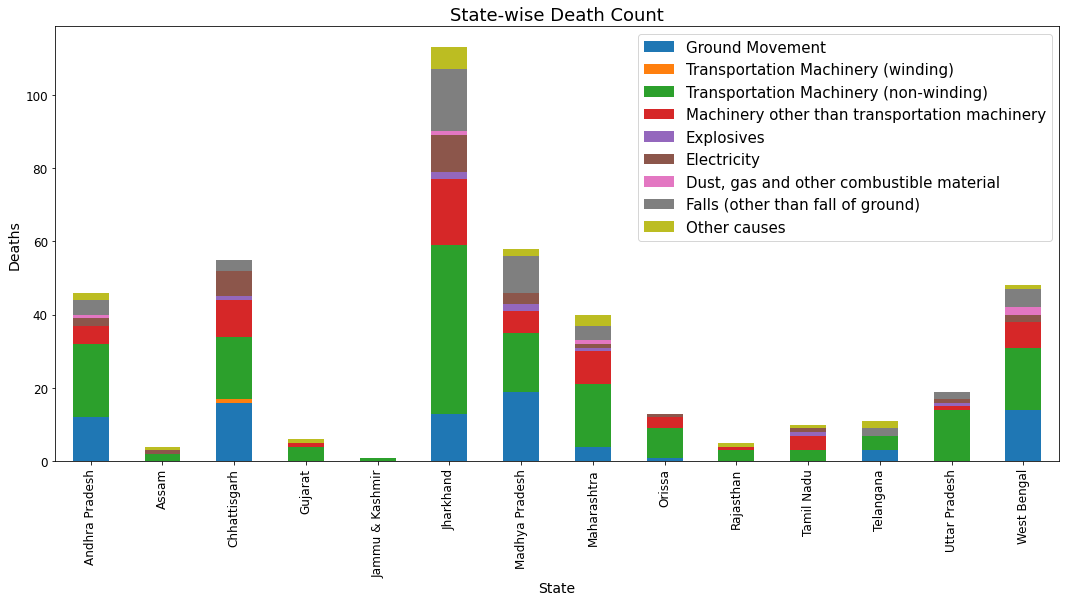

In [ ]:
plot_against_death("State")

### death vs owner company

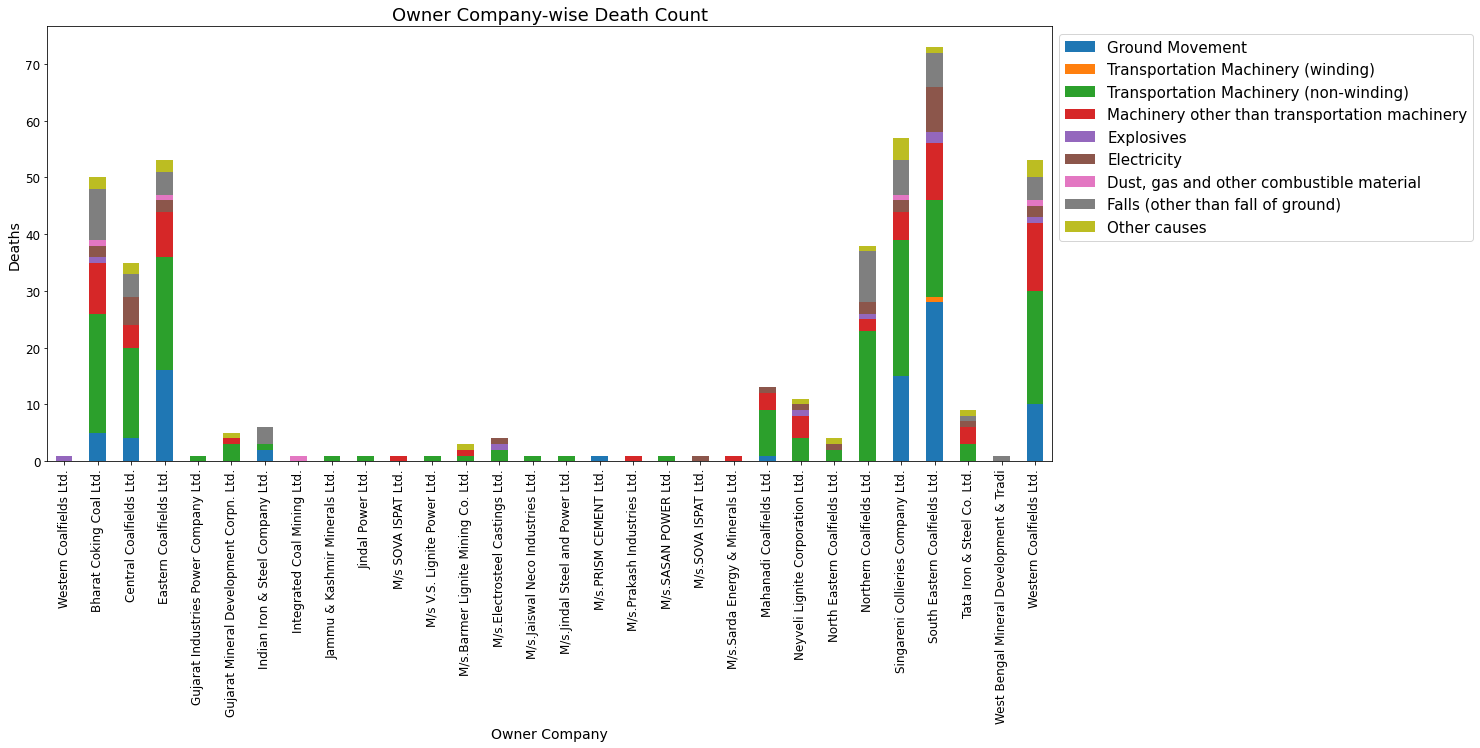

In [ ]:
plot_against_death("Owner Company")

### Deaths vs Month

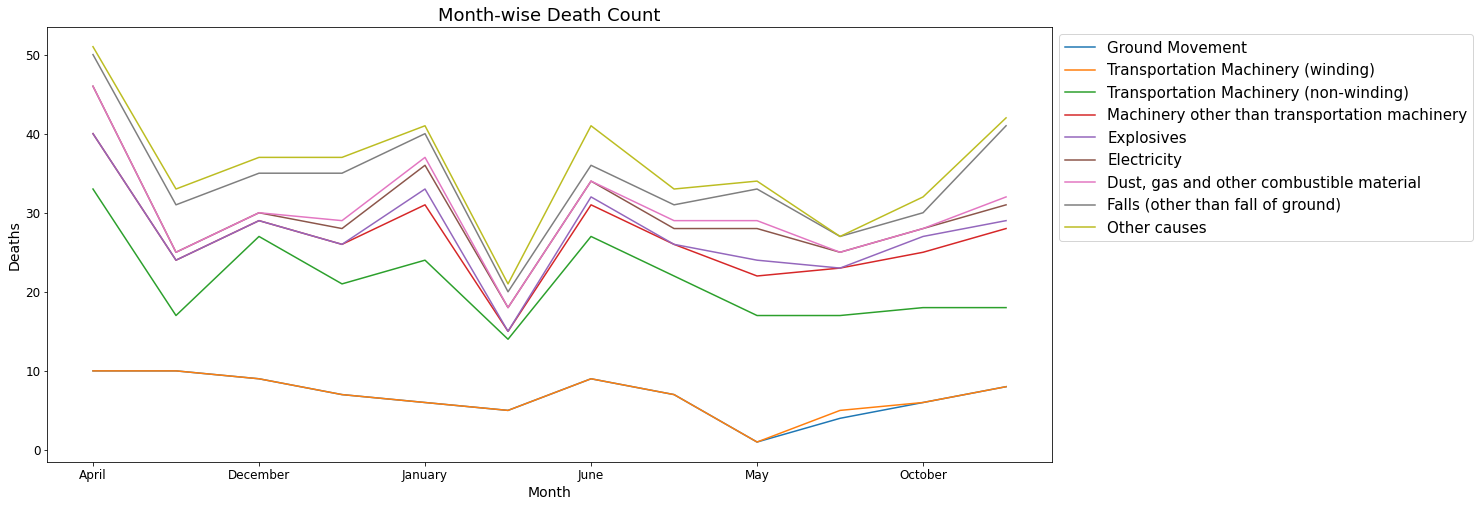

In [ ]:
plot_against_death("Month", chart_type="line")

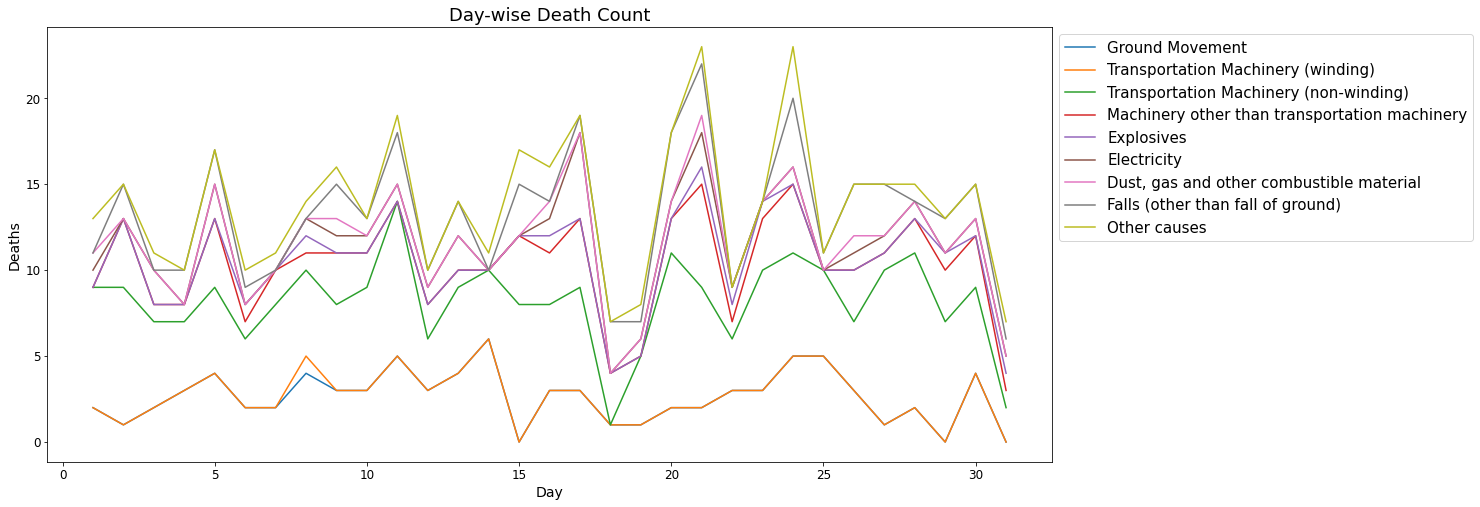

In [ ]:
plot_against_death("Day", chart_type="line")

# importing spacy for nlp

In [ ]:
!python3 -m spacy download 

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-22 17:30:34.074080: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 17:30:34.074187: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 17:30:34.074206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
import spacy

try:
  nlp = spacy.load("en_core_web_lg")
except:
  !python3 -m spacy download en_core_web_lg
  nlp = spacy.load("en_core_web_lg")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-22 17:32:11.314968: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 17:32:11.315094: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 17:32:11.315117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
doc = nlp("dog hates cat")
for token in doc:
  print(token.text, token.pos_, token.dep_)

dog NOUN nsubj
hates VERB ROOT
cat NOUN dobj


In [ ]:
def extract_noun(txt):
  doc = nlp(txt)
  sub = []
  for token in doc:
    if token.pos_ == "NOUN":
      sub.append(token)
  return sub

In [ ]:
data["Remedy"] = data.Remedy.astype("str")
data["Reason"] = data.Reason.astype("str")

In [ ]:
def extract_verb(txt):
  doc = nlp(txt)
  sub = []
  for token in doc:
    if token.pos_ == "VERB":
      sub.append(token)
  return sub

In [ ]:
data["Remedy"] = data.Remedy.astype("str")
data["Remedy Nouns"] = data.Remedy.map(lambda x: extract_noun(x))
data["Remedy Verb"] = data.Remedy.map(lambda x: extract_verb(x))
data["Reason Nouns"] = data.Reason.map(lambda x: extract_noun(x))
data["Reason Verbs"] = data.Reason.map(lambda x: extract_verb(x))

In [ ]:
data

,Accident Code,Accident Reason,Date,State,Mine,District,Owner Company,Name of person,Occupation of the person,Age of the person,...,Remedy,Shift,SubShifts,Accident Group,Month,Day,Remedy Nouns,Remedy Verb,Reason Nouns,Reason Verbs
0,111,Fall of Roof,2010-01-02 12:00:00,West Bengal,SHANKARPUR,Burdwan,Eastern Coalfields Ltd.,Ismail Mia,Dresser,40,...,Had the roof of the gallery been made and kept...,1,1C,1,January,2,"[roof, gallery, engagement, workers, provision...","[made, supported, required, read, framed, aver...","[dresser, coal, roof, span, m, development, ga...","[engaged, dressing, measuring, parted, fell, i..."
1,111,Fall of Roof,2010-02-24 13:30:00,Madhya Pradesh,BARTARAI,Anuppur,South Eastern Coalfields Ltd.,Poshan Das,Support Mistry,44,...,Had the roof of the working place been made an...,1,1C,1,February,24,"[roof, place, compliance, provision, Rules, ac...","[working, made, kept, ensured, required, averted]","[driller, drilling, cable, junction, developme...","[pulling, measuring, parted, fell, entrapping,..."
2,111,Fall of Roof,2010-03-20 09:45:00,Chhattisgarh,BALGI PROJECT,Korba,South Eastern Coalfields Ltd.,Dhani Ram,Explosive Carrier,47,...,Had i) the person carefully examined his worki...,1,1A,1,March,20,"[person, place, interval, holes, dressing, roo...","[Had, examined, working, commencing, charging,...","[carrier, position, blast, hole, bottom, devel...","[stooping, charging, measuring, detached, fell..."
3,111,Fall of Roof,2010-04-03 14:40:00,Madhya Pradesh,BIRSINGHPUR,Umaria,South Eastern Coalfields Ltd.,Daya Ram,Roof Stitcher,56,...,Had the roof of the gallery been made and kept...,1,1D,1,April,3,"[roof, gallery, provisions, accident]","[made, kept, required, averted]","[roof, stitcher, water, hose, pipe, crack, pil...","[drinking, inserted, collect, measuring, fell,..."
4,111,Fall of Roof,2010-04-16 11:30:00,Chhattisgarh,RAJGAMAR 1&2 (PAWAN INCLINE ),Bilaspur,South Eastern Coalfields Ltd.,Kitab Singh,Cableman,40,...,Had i) the working place been carefully examin...,1,1B,1,April,16,"[place, roof, persons, code, practice, dresser...","[Had, working, examined, made, dressing, suppo...","[junction, split, gallery, loading, rib, coal,...","[reached, blasting, left, measuring, separated..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,991,Irruption of Water,2015-04-06 12:04:00,Telangana,SRIRAMPUR NO.3 & 3 A,Adilabad,Singareni Collieries Company Ltd.,Pesaru Satyanarayana,Mining Sirdar,51,...,-,1,1C,9,April,6,[],[],"[mining, sirdar, dip, gallery, panel, coal, mi...","[walking, depillaring, stowing, rushed, hit, b..."
461,993,Drowning in Water,2015-03-01 07:55:00,Jharkhand,BASANTIMATA,Dhanbad,Bharat Coking Coal Ltd.,Manoranjan Pradhan,Shovel Optr( Con),26,...,Had i) the system of dividing the mine into 4 ...,3,3D,9,March,1,"[system, mine, zones, thickness, parting, mine...","[Had, dividing, based, enforced, taken, extrac...","[shovel, bench, parting, m, bench, floor, area...","[deployed, working, having, underlying, collap..."
462,993,Drowning in Water,2015-06-21 14:00:00,Maharashtra,CHANDA RAYATWARI,Chandrapur,Western Coalfields Ltd.,Sarnath Bapu Dhoble,Engineer,55,...,Had the deceased not gone alone near the under...,1,1D,9,June,21,"[sump, coworker, supervisor, life, contraventi...","[deceased, gone, informing, endangering, averted]","[engineer, sump, area, shift, mine, sump, body...","[went, fell, drowned, recovered]"
463,993,Drowning in Water,2015-10-15 08:03:00,Gujarat,"SURKHA(NORTH) LIGNITE MINE,",Bhavanagar,Gujarat Mineral Development Corpn. Ltd.,Paresh Kr. Samantray,Agent,42,...,Had the person during inspection of opencast w...,1,1A,9,October,15,"[person, inspection, workings, area, berm, saf...","[entered, climbed, omitting, ensure, required,...","[agent, cum, -, manager, mine, inspection, are...","[standing, provided, filled, separating, logge..."
